📈 Average FCF Growth Rate: 33.20%


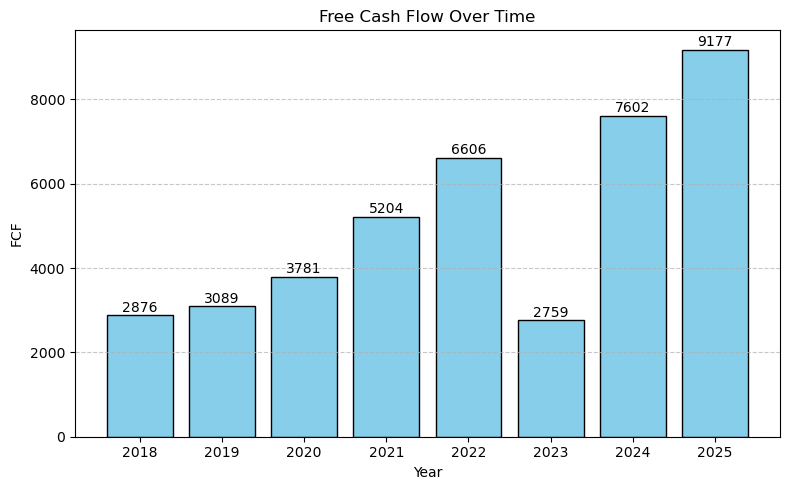

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Sample input data — replace with your actual values
years = [2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025]
net_cash_flow = [5608,6029, 7402, 7556, 10420, 11900, 15018, 17226]  # in crores or millions
capex = [2732, 2940, 3621, 2352, 3814, 9141, 7416, 8049]               # same unit as above

# Step 1: Calculate Free Cash Flow
fcf = [ncf - cx for ncf, cx in zip(net_cash_flow, capex)]

# Step 2: Calculate Year-over-Year Growth Rate
growth_rates = []
for i in range(1, len(fcf)):
    if fcf[i-1] != 0:
        growth = ((fcf[i] - fcf[i-1]) / abs(fcf[i-1])) * 100
        growth_rates.append(growth)

avg_growth_rate = np.mean(growth_rates) if growth_rates else 0

# Step 3: Plot FCF Bar Chart
plt.figure(figsize=(8, 5))
bars = plt.bar(years, fcf, color='skyblue', edgecolor='black')
plt.title('Free Cash Flow Over Time')
plt.xlabel('Year')
plt.ylabel('FCF')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with FCF values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 20, f'{yval:.0f}', ha='center', va='bottom')

# Step 4: Display Average Growth Rate
print(f"📈 Average FCF Growth Rate: {avg_growth_rate:.2f}%")

plt.tight_layout()
plt.show()

📈 Projected Free Cash Flow:
10278.24
11511.63
12893.02
14440.19
16173.01
18113.77
20287.42
22721.91
25448.54
28502.37


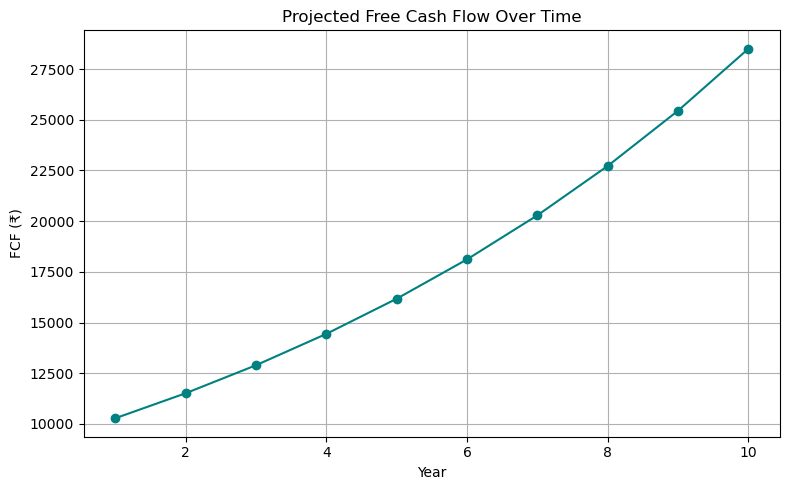

In [4]:
import matplotlib.pyplot as plt

# === Inputs ===
current_fcf =  9177  # Replace with your current FCF value
growth_rate_percent = 12  # Expected annual growth rate in %
projection_years = 10  # Number of years to project

# === Calculations ===
growth_rate = growth_rate_percent / 100
future_fcf = []

for year in range(1, projection_years + 1):
    projected = current_fcf * ((1 + growth_rate) ** year)
    future_fcf.append(projected)

# === Display Results ===
print("📈 Projected Free Cash Flow:")
for i, fcf in enumerate(future_fcf, start=1):
    # print(f"Year {i}: ₹{fcf:,.2f}")
    print(round(fcf,2))

# === Plotting ===
years = list(range(1, projection_years + 1))
plt.figure(figsize=(8, 5))
plt.plot(years, future_fcf, marker='o', linestyle='-', color='teal')
plt.title('Projected Free Cash Flow Over Time')
plt.xlabel('Year')
plt.ylabel('FCF (₹)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [6]:
import numpy as np

# === Inputs ===
fcf_forecast = [10278.24,
                11511.63,
                12893.02,
                14440.19,
                16173.01,
                18113.77,
                20287.42,
                22721.91,
                25448.54,
                28502.37]  # Forecasted Free Cash Flows
discount_rate = 0.09                 # Discount rate (10%)
exit_multiple = 23                 # Exit multiple for TV
growth_rate = 0.03                  # Perpetuity growth rate (3%)

# === Present Value of Forecasted FCFs ===
pv_fcfs = [fcf / (1 + discount_rate) ** (i + 1) for i, fcf in enumerate(fcf_forecast)]

# === Final Year FCF ===
final_year_fcf = fcf_forecast[-1]
n_years = len(fcf_forecast)

# === Terminal Value - Exit Multiple Method ===
tv_exit = final_year_fcf * exit_multiple
discounted_tv_exit = tv_exit / (1 + discount_rate) ** n_years

# === Terminal Value - Perpetuity Growth Method ===
tv_perpetuity = final_year_fcf * (1 + growth_rate) / (discount_rate - growth_rate)
discounted_tv_perpetuity = tv_perpetuity / (1 + discount_rate) ** n_years

# === Enterprise Value ===
ev_exit = sum(pv_fcfs) + discounted_tv_exit
ev_perpetuity = sum(pv_fcfs) + discounted_tv_perpetuity

# === Output ===
print("📊 DCF Valuation Results:")
print(f"Using Exit Multiple Method: {ev_exit:,.2f} crore")
print(f"Using Perpetuity Growth Method: {ev_perpetuity:,.2f} crore")

📊 DCF Valuation Results:
Using Exit Multiple Method: 383,787.76 crore
Using Perpetuity Growth Method: 313,556.13 crore
